In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [349]:
'''A bit of constants.'''

cmtoev = 1.98e-5

gtoev = 5.62e32

stoev = 1/(6.58e-16)

In [350]:
df = pd.read_csv('datafromabsorption.csv',sep=';',header=None)

dataset_menos = pd.read_csv("Default Dataset (3).csv", sep=';',header=None)

transmitance = pd.read_csv('transmittancedata.csv', sep=";", header=None)

novo = pd.read_csv('dataset4.csv', sep=';', header=None)

data1 = pd.read_csv('data1.csv', sep=';', header=None)

data2 = pd.read_csv('data2.csv', sep=';', header=None)

data1_new, data2_new = data1*cmtoev, data2*cmtoev

df_new = df*cmtoev

dataset_new = dataset_menos*cmtoev

novo_modificado = novo*cmtoev


novo

,0,1
0,606.430884,2234.203057
1,624.120776,2294.474759
2,641.897326,2504.236932
3,660.953183,2912.925361
4,661.505870,2698.767768
...,...,...
194,41646.676693,191617.701721
195,43206.841228,202119.404451
196,44975.572230,207901.509733
197,46816.708648,212090.989745


In [351]:
l = 0.0203544

absoportion_1 = [-np.log(transmitance.iloc[x,1])/(l*0.035) for x in range(len(transmitance))]

transmitance.iloc[:,1] = absoportion_1

transmitance_new = transmitance*cmtoev

juntando = pd.concat([transmitance_new.iloc[:258,:258],novo_modificado])

juntando.to_csv('dados_juntos.csv', sep=';', index=False, header=False)


transmitance

,0,1
0,142.061148,246.773462
1,142.220533,226.524842
2,148.914687,270.857522
3,147.241149,296.698559
4,147.241149,313.232364
...,...,...
559,645.397802,2107.159785
560,648.187033,1511.052030
561,648.001084,1551.688288
562,648.001084,1607.283521


In [352]:
dados = pd.read_csv('dados_juntos.csv', sep=';', header=None)
dados


lista1 = [dados.iloc[x,0] for x in range(len(dados))]
sorting = sorted(lista1)

for i in range(len(sorting)):
    dados.iloc[i,0] = sorting[i]

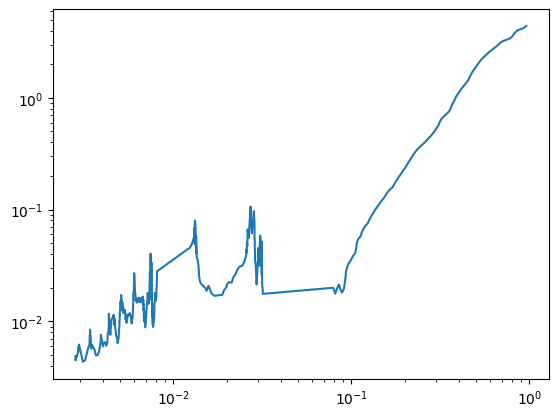

In [353]:
plt.plot(dados[0],dados[1])
plt.xscale('log')
plt.yscale('log')
#plt.xlim(600,5e4)


In [362]:
#Vou colocar alguns dados numéricos aqui:
n = 1e21*(cmtoev)**3#atomos/cm3
rho = 1 * gtoev * (cmtoev)**3#g/cm3
rho_dm = 0.3e9 *(cmtoev)**3 #ev/cm3
year = 365*24*60*60*stoev
kg = gtoev*(10)**3
day = 24*60*60*stoev

In [363]:
def kappa(m, alpha):
    sensitivity = 1/(kg*year)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))/n

def kappa2(m, alpha):
    sensitivity = 1/(kg*day)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))/n

In [364]:
kappa(dados.iloc[27,0],dados.iloc[27,1])

8.546421006889541e-25

In [357]:
interpolation = interp1d(dados.iloc[:,0],dados.iloc[:,1], kind='linear', fill_value="extrapolate")

graphkgyear = [kappa(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]
graphkgday = [kappa2(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]

len(graphkgday)

457

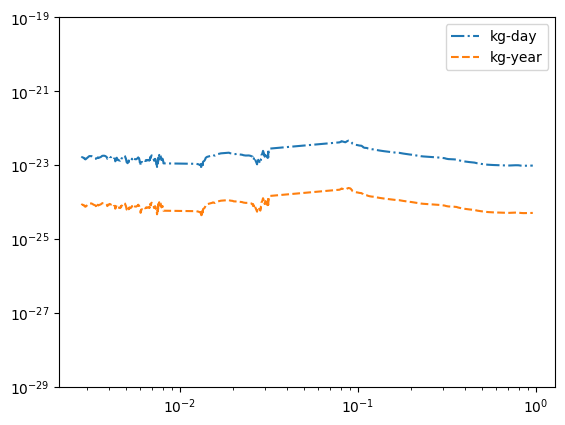

In [358]:
plt.plot(dados[0],graphkgday, linestyle='dashdot', label='kg-day')
plt.plot(dados[0],graphkgyear, linestyle='--', label='kg-year')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-29,1e-19)
#plt.xlim(1e-3,10)
plt.legend()
plt.savefig('plottt.pdf', format='pdf')

In [365]:
#I want to try and interpolate separetly.

fit1 = np.polyfit(data1_new.iloc[:,0], data1_new.iloc[:,1], 1)

fit2 = np.polyfit(data2_new.iloc[:,0], data2_new.iloc[:,1], 3)

fit3 = np.polyfit(transmitance_new.iloc[:,0], transmitance_new.iloc[:,1],2)

funcao1 = np.poly1d(fit1)

funcao2 = np.poly1d(fit2)

funcao3 = np.poly1d(fit3)

lista_plot1 = [funcao1(data1_new.iloc[x,0]) for x in range(len(data1_new))]

lista_plot2 = [funcao2(data2_new.iloc[x,0]) for x in range(len(data2_new))]

lista_plot3 = [funcao2(transmitance_new.iloc[x,0]) for x in range(len(transmitance_new))]

lista_plot4 = lista_plot3 + lista_plot1 + lista_plot2 

xaxis = [transmitance_new.iloc[x,0] for x in range(len(transmitance_new))] + [data1_new.iloc[x,0] for x in range(len(data1_new))] + [data2_new.iloc[x,0] for x in range(len(data2_new))]

#plt.plot(data1_new.iloc[:,0], lista_plot1)
#plt.plot(data2_new.iloc[:,0], lista_plot2)
#plt.plot(transmitance_new.iloc[:,0], lista_plot3)
#plt.plot(xaxis, lista_plot4)

#plt.xscale('log')
#plt.yscale('log')



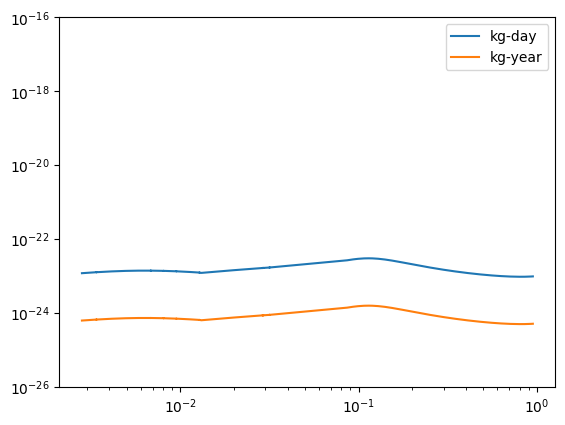

In [366]:
graphkgyear1 = [kappa(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgyear2 = [kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgyear3 = [kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph = [kappa(xaxis[x], lista_plot4[x]) for x in range(len(xaxis))]
graph2 = graphkgyear3 + graphkgyear1 + graphkgyear2

graphkgday1 = [kappa2(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgday2 = [kappa2(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgday3 = [kappa2(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph3 = graphkgday3 + graphkgday1 + graphkgday2

#plt.plot(data1_new.iloc[:,0], graphkgyear1)
#plt.plot(data2_new.iloc[:,0], graphkgyear2)
#plt.plot(transmitance_new.iloc[:,0], graphkgyear3)
plt.plot(xaxis, graph3, label='kg-day')
plt.plot(xaxis, graph2, label = 'kg-year')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-26, 1e-16)
plt.legend()